In [165]:
#Importing key libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import collections
import matplotlib.patches as mpatches
import seaborn as sns

In [166]:
#This function loads in a list from a csv file
#Takes in one parameter - csv file path
def loadList(filename):
    with open(filename,newline='') as f:
        reader = csv.reader(f)
        dataList = list(reader)
    return dataList

In [167]:
def switchToISOa2(toSwitch,countries,column):

    '''
    Takes in dataset, dictionary of countries and iso_a2 codes, column of the dataset that involves a country name
    
    Return the dataset, but with an iso_a2 code, instead of country names
    '''
    
    #Loops through the a dataset and replaces the value for country with that of the iso_a2 code - using the 
    #"countries" dictionary defined 
    for i in range(toSwitch.shape[0]):
        if toSwitch[column].iloc[i] in [i for i in countries]:
            toSwitch[column].iloc[i] = countries[toSwitch[column].iloc[i]]

    #Loops through the column involving country names in the dataset.If the entry is greater than 2 (an
    # iso code), delete it - as it is not in the iso list
    for i in toSwitch[column]:
        if len(i) != 2:
            toSwitch = toSwitch.drop(toSwitch.loc[toSwitch[column] == i].index)
    return toSwitch

In [168]:
def compareDrop(df_to_drop,df_to_compare,col_to_drop,col_to_compare):
    '''
    Takes in four variables -> df_to_drop, df_to_compare,col_to_drop,col_to_compare
    
    If there are excess values in df_to_drop[col_to_drop], compared to df_to_compare['col_to_compare'] \
    drop those excess values 
    
    '''

    #make a copy of the df_to_drop dataset - we can not iterate through a dataframe and modify it 
    draft = df_to_drop
    #Loop through the copy. If the country is not part of the df_to_compare dataset - remove it
    for i in draft[col_to_drop]:
        if i not in df_to_compare[col_to_compare].values:
            df_to_drop = df_to_drop.drop(df_to_drop.loc[df_to_drop[col_to_drop] == i].index)
    return df_to_drop

In [169]:
#callin the loadList function and passing in the COVID-19 vaccine data
covData = loadList('vaccine_data_global.csv')

In [170]:
#Converting the data to a pandas dataframe with the DataFrame() function
covFrame = pd.DataFrame(covData,columns=covData[0])
#Do not want the columns to be part of the dataset - so we use the iloc attribute \
#to select everything below first row
covFrame = covFrame.iloc[1:]
covFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
1,,Afghanistan,2021-12-09,5228706,4397449,3566192,2021-12-09,4
2,,Albania,2021-12-09,2161198,1090591,981170,2021-12-09,8
3,,Algeria,2021-12-09,12293060,6875003,5391232,2021-12-09,12
4,,Andorra,2021-12-09,104534,54999,49535,2021-12-09,20
5,,Angola,2021-12-09,10018061,6737721,3280340,2021-12-09,24


In [171]:
#Columns attribute
covFrame.columns

Index(['Province_State', 'Country_Region', 'Date', 'Doses_admin',
       'People_partially_vaccinated', 'People_fully_vaccinated',
       'Report_Date_String', 'UID'],
      dtype='object')

In [172]:
#Shape attribute
covFrame.shape

(634, 8)

In [173]:
#Removing all empty values from the dataframe
#Use for loop to see if any entries for vaccinations are empty, and insert the ones that are not empty in a list
fullData = []

for i in covFrame.iloc:
    if i['People_partially_vaccinated'] != '':
        fullData.append(i)

In [174]:
#Make a pandas dataframe out of the list containing the vaccination rates (see cell above)
fullFrame = pd.DataFrame(fullData,columns=covData[0])
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
1,,Afghanistan,2021-12-09,5228706,4397449,3566192,2021-12-09,4
2,,Albania,2021-12-09,2161198,1090591,981170,2021-12-09,8
3,,Algeria,2021-12-09,12293060,6875003,5391232,2021-12-09,12
4,,Andorra,2021-12-09,104534,54999,49535,2021-12-09,20
5,,Angola,2021-12-09,10018061,6737721,3280340,2021-12-09,24


In [175]:
#Comparing the shape before and after deleting elements 
# (number of countries - rows x number of columns)
print(fullFrame.shape)

(183, 8)


In [176]:
#Package pycountry for countries' iso country codes 

import pycountry

#Loop through all the countries available - store the name of a country as a key in a dictionary and the iso_a2 \
#code as a value
countries = {}
for i in pycountry.countries:
    countries[i.name] = i.alpha_2


In [177]:
#Looping through every row in the dataset (by index). If the country name is in the list of countries, 
#replace it with the iso a2 code (the name of the country is the key of the dictionary)

for i in range(fullFrame.shape[0]):
    
    if fullFrame['Country_Region'].iloc[i] in [i for i in countries]:
        fullFrame['Country_Region'].iloc[i] = countries[fullFrame['Country_Region'].iloc[i]]


In [178]:
#How many of the countries actually changed names
print(fullFrame['Country_Region'].values)

['AF' 'AL' 'DZ' 'AD' 'AO' 'AG' 'AR' 'AM' 'AU' 'AT' 'AZ' 'BS' 'BH' 'BD'
 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BT' 'Bolivia' 'BA' 'BW' 'BR' 'Brunei' 'BG' 'BF'
 'Burma' 'BI' 'KH' 'CM' 'CA' 'CF' 'TD' 'CL' 'CN' 'CO' 'KM' 'CR'
 "Cote d'Ivoire" 'HR' 'CU' 'CY' 'CZ' 'DK' 'DJ' 'DM' 'DO' 'EC' 'EG' 'SV'
 'GQ' 'EE' 'SZ' 'ET' 'FJ' 'FI' 'FR' 'GA' 'GM' 'GE' 'DE' 'GH' 'GR' 'GD'
 'GT' 'GN' 'GW' 'GY' 'HT' 'HN' 'HU' 'IS' 'IN' 'ID' 'Iran' 'IQ' 'IE' 'IL'
 'IT' 'JM' 'JP' 'JO' 'KZ' 'KE' 'KI' 'Kosovo' 'KW' 'KG' 'Laos' 'LV' 'LB'
 'LS' 'LR' 'LY' 'LI' 'LT' 'LU' 'MG' 'MW' 'MY' 'MV' 'ML' 'MT' 'MR' 'MU'
 'MX' 'Moldova' 'MC' 'MN' 'ME' 'MA' 'MZ' 'NA' 'NP' 'NL' 'NZ' 'NI' 'NE'
 'NG' 'MK' 'NO' 'OM' 'PK' 'PA' 'PG' 'PY' 'PE' 'PH' 'PL' 'PT' 'QA' 'RO'
 'Russia' 'RW' 'KN' 'LC' 'VC' 'WS' 'SM' 'ST' 'SA' 'SN' 'RS' 'SC' 'SL' 'SG'
 'SK' 'SI' 'SB' 'SO' 'ZA' 'SS' 'ES' 'LK' 'SD' 'SR' 'SE' 'CH' 'Syria'
 'Taiwan*' 'TJ' 'Tanzania' 'TH' 'TG' 'TT' 'TN' 'TR' 'US' 'US (Aggregate)'
 'UG' 'UA' 'AE' 'GB' 'UY' 'UZ' 'VU' 'Venezuela' 'Vietnam' 'World' 'YE'


In [179]:
#Resetting dataframe index (index goes from 1,2,3...)
#Something to be done after removing columns in a pandas dataframe
fullFrame = fullFrame.reset_index(drop=True)

In [180]:
#Looping through the pandas dataframe by index, and removing any entries that has a country name more than length 2
#Only country codes are in the Country_Region column
for i in range(fullFrame.shape[0]):
    if len(fullFrame['Country_Region'].loc[i]) != 2:
        fullFrame = fullFrame.drop(i)

In [181]:
#Confirm that each 
print(fullFrame['Country_Region'].values)

['AF' 'AL' 'DZ' 'AD' 'AO' 'AG' 'AR' 'AM' 'AU' 'AT' 'AZ' 'BS' 'BH' 'BD'
 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BT' 'BA' 'BW' 'BR' 'BG' 'BF' 'BI' 'KH' 'CM'
 'CA' 'CF' 'TD' 'CL' 'CN' 'CO' 'KM' 'CR' 'HR' 'CU' 'CY' 'CZ' 'DK' 'DJ'
 'DM' 'DO' 'EC' 'EG' 'SV' 'GQ' 'EE' 'SZ' 'ET' 'FJ' 'FI' 'FR' 'GA' 'GM'
 'GE' 'DE' 'GH' 'GR' 'GD' 'GT' 'GN' 'GW' 'GY' 'HT' 'HN' 'HU' 'IS' 'IN'
 'ID' 'IQ' 'IE' 'IL' 'IT' 'JM' 'JP' 'JO' 'KZ' 'KE' 'KI' 'KW' 'KG' 'LV'
 'LB' 'LS' 'LR' 'LY' 'LI' 'LT' 'LU' 'MG' 'MW' 'MY' 'MV' 'ML' 'MT' 'MR'
 'MU' 'MX' 'MC' 'MN' 'ME' 'MA' 'MZ' 'NA' 'NP' 'NL' 'NZ' 'NI' 'NE' 'NG'
 'MK' 'NO' 'OM' 'PK' 'PA' 'PG' 'PY' 'PE' 'PH' 'PL' 'PT' 'QA' 'RO' 'RW'
 'KN' 'LC' 'VC' 'WS' 'SM' 'ST' 'SA' 'SN' 'RS' 'SC' 'SL' 'SG' 'SK' 'SI'
 'SB' 'SO' 'ZA' 'SS' 'ES' 'LK' 'SD' 'SR' 'SE' 'CH' 'TJ' 'TH' 'TG' 'TT'
 'TN' 'TR' 'US' 'UG' 'UA' 'AE' 'GB' 'UY' 'UZ' 'VU' 'YE' 'ZM' 'ZW']


In [182]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4
1,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8
2,,DZ,2021-12-09,12293060,6875003,5391232,2021-12-09,12
3,,AD,2021-12-09,104534,54999,49535,2021-12-09,20
4,,AO,2021-12-09,10018061,6737721,3280340,2021-12-09,24


In [183]:
fullFrame.shape

(167, 8)

In [184]:
#Loading second dataframe -> this will look at different countries' income levels
income = loadList("highLow.csv")
#Convert list to pandas dataframe.
incomeFrame = pd.DataFrame(income[1:],columns=income[0])
incomeFrame.head()

,﻿Country,Income group,Region,Lending category,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,High income,Latin America & Caribbean,null,null,10360,11760,12230,13190,13990,...,22450,23520,24510,25350,26560,26840,27120,null,null,null
1,Afghanistan,Low income,South Asia,IDA,null,null,null,null,null,null,...,530,630,660,630,600,550,530,520,530,500
2,Angola,Lower middle income,Sub-Saharan Africa,IBRD,670,650,860,780,1380,1170,...,3410,4170,4780,5010,4520,3770,3450,3210,2970,2230
3,Albania,Upper middle income,Europe & Central Asia,IBRD,730,730,760,650,410,280,...,4410,4360,4540,4540,4390,4320,4290,4860,5220,5210
4,Andorra,High income,Europe & Central Asia,null,null,null,null,null,null,null,...,null,null,null,null,null,null,null,null,null,null


In [185]:
#Shape of the pandas dataframe
incomeFrame.shape

(217, 38)

In [186]:
#Columns of the pandas dataframe
incomeFrame.columns

Index(['﻿Country', 'Income group', 'Region', 'Lending category', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [187]:
#Only columns that are relevant - Country and Income group
#Column name include \ufeff, because the name is obfuscated
incomeFrame = incomeFrame[['\ufeffCountry','Income group']]

In [188]:
#Create a pandas dictionary that maps each country's name to its income level.
#Done my looping through the income level dataframe. The key is the country name, value is income level.
countryDict = {}

for i in range(incomeFrame.shape[0]):
    countryDict[incomeFrame.iloc[i][0]] = incomeFrame.iloc[i][1]
    

In [189]:
#Make a copy of countryDict (can not loop through a dictionary as we modify it)
countryTemp = countryDict

#Loop through the dictionary of countries
for i in list(countryTemp):
    #Replace each key with the iso a2 country code
    if i in [i for i in countries]:
        countryDict[countries[i]] = countryDict.pop(i)
    else:
    #If country name is not a key in the iso a2 dictionary (countries), remove it from the countryTemp dictionary.
        countryDict.pop(i)
countryDict
      

{'AW': 'High income',
 'AF': 'Low income',
 'AO': 'Lower middle income',
 'AL': 'Upper middle income',
 'AD': 'High income',
 'AE': 'High income',
 'AR': 'Upper middle income',
 'AM': 'Upper middle income',
 'AS': 'Upper middle income',
 'AG': 'High income',
 'AU': 'High income',
 'AT': 'High income',
 'AZ': 'Upper middle income',
 'BI': 'Low income',
 'BE': 'High income',
 'BJ': 'Lower middle income',
 'BF': 'Low income',
 'BD': 'Lower middle income',
 'BG': 'Upper middle income',
 'BH': 'High income',
 'BA': 'Upper middle income',
 'BY': 'Upper middle income',
 'BZ': 'Lower middle income',
 'BM': 'High income',
 'BR': 'Upper middle income',
 'BB': 'High income',
 'BN': 'High income',
 'BT': 'Lower middle income',
 'BW': 'Upper middle income',
 'CF': 'Low income',
 'CA': 'High income',
 'CH': 'High income',
 'CL': 'High income',
 'CN': 'Upper middle income',
 'CM': 'Lower middle income',
 'CO': 'Upper middle income',
 'KM': 'Lower middle income',
 'CV': 'Lower middle income',
 'CR': '

In [190]:
#Sort the values of the master covid vaccine dataset alphabetically
fullFrame = fullFrame.sort_values('Country_Region')

In [191]:
#Construct an ordered dictionary from the collections library
#It will be in the form of a list of tuples - with the first element in the tuple being country iso_a2 name, second
#being income level
orderedCountry = collections.OrderedDict(sorted(countryDict.items()))

In [192]:
fullFrame['Income'] = np.zeros(fullFrame.shape[0])

In [193]:
for i in range(fullFrame.shape[0]):
    fullFrame['Income'].iloc[i] = 3
    

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [194]:
#Loop through ordered dictionary - store the first element in the list of tuples (country iso_a2 code) in a 
#list called ordKey, and store the second element (income level) in a list called ordVal
ordKey = [i for i in orderedCountry]
ordVal = [j for j in orderedCountry.values()]

In [195]:
print(ordKey)

['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AS', 'AT', 'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BM', 'BN', 'BR', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CF', 'CH', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CY', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GI', 'GL', 'GN', 'GQ', 'GR', 'GT', 'GU', 'GW', 'GY', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KH', 'KI', 'KM', 'KW', 'KY', 'KZ', 'LB', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'ME', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MP', 'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NC', 'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PR', 'PT', 'PW', 'PY', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SC', 'SD', 'SE', 'SG', 'SI', 'SL', 'SM', 'SN', 'SO', 'SR', 'SS', 'ST', 'SV', 'SX', 'SY', 'SZ', 'TC', 'TD', 'TG', 'TH', 'TJ

In [196]:
#Comparing the length of ordKey with the number of iso_a2 codes in our master vaccination dataset
print(len(ordKey))
print(len(list(fullFrame['Country_Region'].values)))

184
167


In [197]:
#Creating a copy of the ordered dictionary (can not iterate and delete the same dictionary)
orderedCopy = orderedCountry.copy()
#Looping through the copy, and deleting any excess entries (iso_a2 country codes that are not in the master dataframe)
for i in orderedCopy:
    if i not in fullFrame['Country_Region'].values:
        del orderedCountry[i]
        

In [198]:
#Relooping though the ordered dictionary to extract the iso_a2 code and income levels (after deleting)
ordKey = [i for i in orderedCountry]
ordVal = [j for j in orderedCountry.values()]

In [199]:
#Removing any excess values for income level (Because we removed from ordkey, but did not complement by removing \
#from ordVal)
for i in fullFrame["Country_Region"].values:
    if i not in ordKey:
        fullFrame = fullFrame.drop(fullFrame.loc[fullFrame['Country_Region'] == i].index)
        

In [200]:
#ordVal are the values for income level. We are adding it to our datarame by first converting it to a numpy array
ordVal = np.array(ordVal)
fullFrame['income'] = ordVal

In [201]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income
3,,AD,2021-12-09,104534,54999,49535,2021-12-09,20,3.0,High income
172,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income
0,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income
5,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income
1,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income


In [202]:
#Again, we reorder the pandas dataframe after removal
fullFrame = fullFrame.reset_index(drop=True)
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income
0,,AD,2021-12-09,104534,54999,49535,2021-12-09,20,3.0,High income
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income


In [203]:
#Load another dataset, this time as a pandas dataframe -> with the .read_csv function
life = pd.read_csv('life-expectancy.csv')
life.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [204]:
#We only visualize the most recent gdp value - in this case 2019
life = life.drop(life.loc[life['Year'] != 2019].index)

In [205]:
life.head()

,Entity,Code,Year,Life expectancy
69,Afghanistan,AFG,2019,64.833
141,Africa,NaN,2019,63.170
211,Albania,ALB,2019,78.573
284,Algeria,DZA,2019,76.880
354,American Samoa,ASM,2019,73.745


In [206]:
#Using the helper function I defined at the beginning
#Takes in 3 parameters - life expectancy dataset, countries, 'Entity' column (switch Entity entries from country name)
#to ISOa2 value
life = switchToISOa2(life,countries,'Entity')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [207]:
life.head()

,Entity,Code,Year,Life expectancy
69,AF,AFG,2019,64.833
211,AL,ALB,2019,78.573
284,DZ,DZA,2019,76.880
354,AS,ASM,2019,73.745
500,AD,AND,2019,83.732


In [208]:
#Sort the values in the life expectancy dataframe alphabetically
life = life.sort_values('Entity')

In [209]:
#Shape of the life expectancy dataset
life.shape

(205, 4)

In [210]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income
0,,AD,2021-12-09,104534,54999,49535,2021-12-09,20,3.0,High income
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income


In [211]:
life.head()

,Entity,Code,Year,Life expectancy
500,AD,AND,2019,83.732
17741,AE,ARE,2019,77.972
69,AF,AFG,2019,64.833
711,AG,ATG,2019,77.016
641,AI,AIA,2019,81.877


In [212]:
#Drops excess values in life['Entity'] compared to fullFrame['Country_Region']
life = compareDrop(life,fullFrame,'Entity','Country_Region')

In [213]:
life.head()

,Entity,Code,Year,Life expectancy
500,AD,AND,2019,83.732
17741,AE,ARE,2019,77.972
69,AF,AFG,2019,64.833
711,AG,ATG,2019,77.016
211,AL,ALB,2019,78.573


In [214]:
#Add our dataset of life expectancy to the master pandas dataframe
life.head()
fullFrame['Life_Expec'] = life['Life expectancy'].values

In [215]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec
0,,AD,2021-12-09,104534,54999,49535,2021-12-09,20,3.0,High income,83.732
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income,77.016
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573


In [216]:
#Load in a dataset for the gdp per capita of countries in the world
econ = pd.read_csv('gdp-per-capita-worldbank.csv')
econ.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [217]:
#Remove GDP values from years other than 2019 (we want recent, pre-covid data)
econ = econ.drop(econ.loc[econ['Year'] != 2019].index)
econ.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
17,Afghanistan,AFG,2019,2065.036235
48,Africa Eastern and Southern,NaN,2019,3568.597017
79,Africa Western and Central,NaN,2019,4142.398382
110,Albania,ALB,2019,13671.488422
141,Algeria,DZA,2019,11510.557088


In [218]:
#Shape of the dataset
econ.shape

(238, 4)

In [219]:
#Drop missing values 
econ = econ.dropna()

In [220]:
#Using the helper function I defined at the beginning
#Takes in 3 parameters - gdp per capita dataset, countries, 'Entity' column (switch Entity entries from country name)
#to ISOa2 value

econ = switchToISOa2(econ,countries,'Entity')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [221]:
#Alphabetically sort the values of the country columns
econ = econ.sort_values('Entity')
econ.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
6798,AE,ARE,2019,67119.153244
17,AF,AFG,2019,2065.036235
203,AG,ATG,2019,21548.725008
110,AL,ALB,2019,13671.488422
296,AM,ARM,2019,13653.763381


In [222]:
#Drops excess values in econ['Entity'] compared to fullFrame['Country_Region']
econ = compareDrop(econ,fullFrame,'Entity','Country_Region')

In [223]:
#Drops excess values in fullFrame['Country_Region'] compared to econ['Entity']
fullFrame = compareDrop(fullFrame,econ,'Country_Region','Entity')

In [224]:
econ.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
6798,AE,ARE,2019,67119.153244
17,AF,AFG,2019,2065.036235
203,AG,ATG,2019,21548.725008
110,AL,ALB,2019,13671.488422
296,AM,ARM,2019,13653.763381


In [225]:
#Adding the GDP values to the master dataframe after converting it to a numpy array
fullFrame['GDP per capita, PPP'] = econ["GDP per capita, PPP (constant 2017 international $)"].values

In [226]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec,"GDP per capita, PPP"
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972,67119.153244
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833,2065.036235
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income,77.016,21548.725008
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573,13671.488422
5,,AM,2021-12-09,1352805,835816,516989,2021-12-09,51,3.0,Upper middle income,75.087,13653.763381


In [227]:
#New dataset loaded in as a pandas dataframe
popul = pd.read_csv('population.csv')
#Extract only the columns for country name and population
popul = popul[['Country (or dependency)', 'Population (2020)']]
popul.head()

,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [228]:
#Using the helper function I defined at the beginning
#Takes in 3 parameters - population dataset, countries, 'Country (or dependency)' column \
#(switch 'Country (or dependency)' entries from country name to iso a2 code)
#to ISOa2 value

popul = switchToISOa2(popul,countries,'Country (or dependency)')


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [229]:
#Drops excess values in popul['Country (or dependency)'] compared to fullFrame['Country_Region']
popul = compareDrop(popul,fullFrame,'Country (or dependency)','Country_Region')

In [230]:
#Drops excess values in fullFrame['Country_Region'] compared to popul['Country (or dependency)']
fullFrame = compareDrop(fullFrame,popul,'Country_Region','Country (or dependency)')

In [231]:
fullFrame.shape

(151, 12)

In [232]:
popul.shape

(151, 2)

In [233]:
#Sort values in the country name column alphabetically
popul = popul.sort_values('Country (or dependency)')
popul.head()

,Country (or dependency),Population (2020)
92,AE,9910892
36,AF,39074280
200,AG,98069
139,AL,2877239
136,AM,2964219


In [234]:
#Add the column of population values to the fullFrame dataset
fullFrame['Population'] = popul["Population (2020)"].values

In [235]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec,"GDP per capita, PPP",Population
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972,67119.153244,9910892
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833,2065.036235,39074280
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income,77.016,21548.725008,98069
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573,13671.488422,2877239
5,,AM,2021-12-09,1352805,835816,516989,2021-12-09,51,3.0,Upper middle income,75.087,13653.763381,2964219


In [236]:
#Convert the column of fully vaccinated individuals to integers (they are strings initially)
fullFrame["People_fully_vaccinated"] = pd.to_numeric(fullFrame["People_fully_vaccinated"])

In [237]:
#Calculate the vaccination rate per population by dividing total vaccinations by population
vacperPop = []

vaxRate = fullFrame['People_fully_vaccinated'].values
population = fullFrame['Population'].values
#This is done by looping through both columns for total vaccinations and population, and dividing vaxRate by 
#population. Round to 2 decimal places
for i in range(fullFrame.shape[0]):
    vacperPop.append(round(vaxRate[i]/population[i]*100,2))

In [238]:
#Add this value of vaccination rate to the master dataframe
fullFrame['vaccination_per_pop'] = np.array(vacperPop)

In [239]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec,"GDP per capita, PPP",Population,vaccination_per_pop
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972,67119.153244,9910892,89.12
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833,2065.036235,39074280,9.13
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income,77.016,21548.725008,98069,58.47
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573,13671.488422,2877239,34.10
5,,AM,2021-12-09,1352805,835816,516989,2021-12-09,51,3.0,Upper middle income,75.087,13653.763381,2964219,17.44


In [240]:
fullFrame.income.unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [241]:
#Extracting all rows for each individual income level and storing in separate dataframes
#Eg: low will be a subdataframe of fullFrame consisting of all the rows involvin low income countries
low = fullFrame[fullFrame['income'] == "Low income"]
lowMid = fullFrame[fullFrame['income'] == 'Lower middle income']
upMid = fullFrame[fullFrame['income'] == 'Upper middle income']
up = fullFrame[fullFrame['income'] == 'High income']


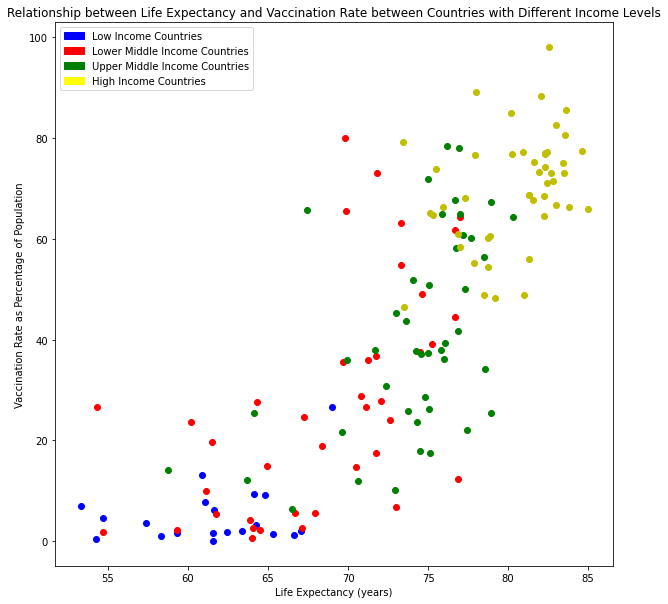

In [242]:
#Get current axes
ax = plt.gca()

#Scatter plot of each of the Life expectancy values on the x-axis and vaccination rate on the y-axis
#Each income level will have a different colour (eg: low income -> blue, high income -> yellow)
#Scatter is an instance method of ax (the current method axes)
ax.scatter(low['Life_Expec'].values, low['vaccination_per_pop'].values,color='b')

ax.scatter(lowMid['Life_Expec'].values, lowMid['vaccination_per_pop'].values,color='r')


ax.scatter(upMid['Life_Expec'].values, upMid['vaccination_per_pop'].values,color='g')

ax.scatter(up['Life_Expec'].values, up['vaccination_per_pop'].values,color='y')

#Get the current figure
fig = plt.gcf()

#Enlarge size to 10x10 inches
#set_size_inches is an instance method of fig (the figure)
fig.set_size_inches(10, 10)

#X and y axis labels
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Vaccination Rate as Percentage of Population")

#title labels
plt.title("Relationship between Life Expectancy and Vaccination Rate between Countries with Different Income Levels")


#Legend from matplotlib.patches library. Change color and add a label to a patch
lowLegend = mpatches.Patch(color='blue', label='Low Income Countries')
lowMidlegend = mpatches.Patch(color='red', label='Lower Middle Income Countries')
midUplegend = mpatches.Patch(color='green', label='Upper Middle Income Countries')
upLegend = mpatches.Patch(color='yellow', label='High Income Countries')

#Store all patches as part of a legend
plt.legend(handles=[lowLegend,lowMidlegend,midUplegend,upLegend])

Text(0.5, 1.0, 'Relationship between GDP per Capita and Vaccination Rate between Countries with Different Income Levels')

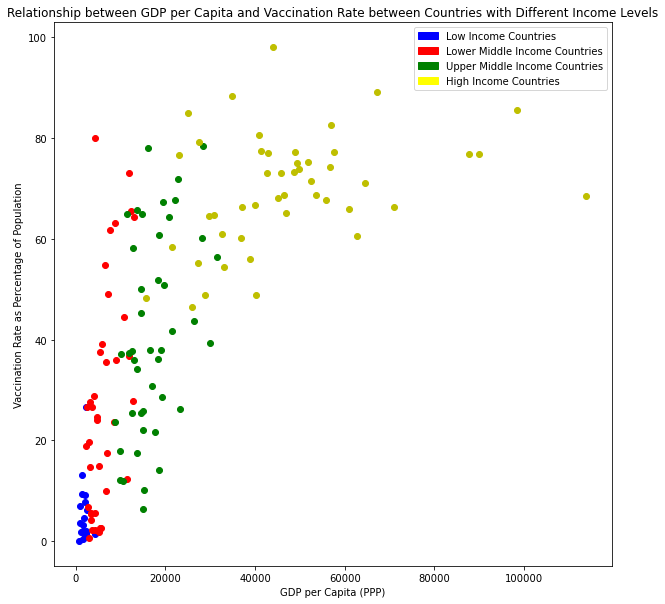

In [243]:
#Get current axes
ax = plt.gca()
#Scatter plot of each of the Life expectancy values on the x-axis and vaccination rate on the y-axis
#Each income level will have a different colour (eg: low income -> blue, high income -> yellow)
#Scatter is an instance method of ax (the current method axes)
ax.scatter(low['GDP per capita, PPP'].values, low['vaccination_per_pop'].values,color='b')

ax.scatter(lowMid['GDP per capita, PPP'].values, lowMid['vaccination_per_pop'].values,color='r')


ax.scatter(upMid['GDP per capita, PPP'].values, upMid['vaccination_per_pop'].values,color='g')

ax.scatter(up['GDP per capita, PPP'].values, up['vaccination_per_pop'].values,color='y')

#Get the current figure
fig = plt.gcf()

#Enlarge size to 10x10 inches
#set_size_inches is an instance method of fig (the figure)
fig.set_size_inches(10, 10)

#X and y axis labels
plt.xlabel("GDP per Capita (PPP)")
plt.ylabel("Vaccination Rate as Percentage of Population")

#Legend from matplotlib.patches library. Change color and add a label to a patch
lowLegend = mpatches.Patch(color='blue', label='Low Income Countries')
lowMidlegend = mpatches.Patch(color='red', label='Lower Middle Income Countries')
midUplegend = mpatches.Patch(color='green', label='Upper Middle Income Countries')
upLegend = mpatches.Patch(color='yellow', label='High Income Countries')

#Store all patches as part of a legend
plt.legend(handles=[lowLegend,lowMidlegend,midUplegend,upLegend])



#title labels
plt.title('Relationship between GDP per Capita and Vaccination Rate between Countries with Different Income Levels')




In [244]:
#Find the average value for gdp, life expectancy, and vaccination rate for each of the income level datasets

lowVax = np.average(low['vaccination_per_pop'].values)
lowMidvax = np.average(lowMid['vaccination_per_pop'].values)
upMidvax = np.average(upMid['vaccination_per_pop'].values)
upVax = np.average(up['vaccination_per_pop'].values)

    
lowGdp = np.average(low['GDP per capita, PPP'].values)
lowMidgdp = np.average(lowMid['GDP per capita, PPP'].values)
upMidgdp = np.average(upMid['GDP per capita, PPP'].values)
upGdp = np.average(up['GDP per capita, PPP'].values)

lowLife = np.average(low['Life_Expec'].values)
lowMidlife = np.average(lowMid['Life_Expec'].values)
upMidlife = np.average(upMid['Life_Expec'].values)
upLife = np.average(up['Life_Expec'].values)

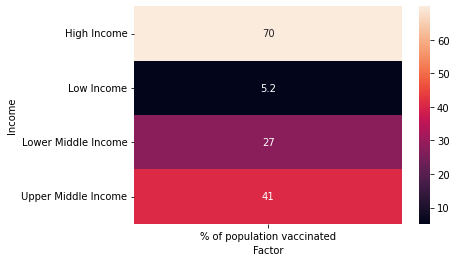

In [245]:
#vaxHeatDict -> will be switched to a pivot table -> 'Value' key contains the values within the pivot table, income
#contains the y-axis, columns contain the x-axis

#Done for vaccination data

vaxHeatDict = {
    
    'Income': ['Low Income','Lower Middle Income','Upper Middle Income','High Income'],
    'Factor': ['% of population vaccinated','% of population vaccinated','% of population vaccinated',\
               '% of population vaccinated'],
    'Value': [lowVax,lowMidvax,upMidvax,upVax]
    
}
#Convert the dictionary to a pandas dataframe
vaxMapdata = pd.DataFrame(vaxHeatDict)
#Convert to a pivot table (pivot is an instance method)
vaxMapdata = vaxMapdata.pivot(index= 'Income',columns='Factor',values='Value')
#Make a seaborn heatmap of the pandas pivot table
vaxMap = sns.heatmap(vaxMapdata,annot=True)

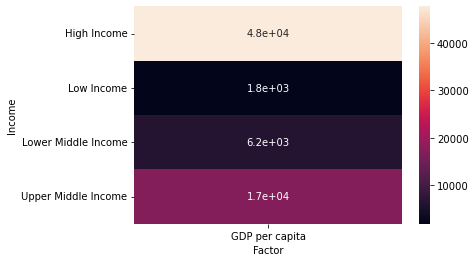

In [246]:
#gdpHeatDict -> will be switched to a pivot table -> 'Value' key contains the values within the pivot table, income
#contains the y-axis, columns contain the x-axis

#Done for gdp data

gdpHeatDict = {
    
    'Income': ['Low Income','Lower Middle Income','Upper Middle Income','High Income'],
    'Factor': ['GDP per capita','GDP per capita','GDP per capita','GDP per capita'],
    'Value': [lowGdp,lowMidgdp,upMidgdp,upGdp]
    
}

#Convert the dictionary to a pandas dataframe
gdpMapdata = pd.DataFrame(gdpHeatDict)
#Convert to a pivot table (pivot is an instance method)
gdpMapdata = gdpMapdata.pivot(index= 'Income',columns='Factor',values='Value')
#Make a seaborn heatmap of the pandas pivot table
gdpMap = sns.heatmap(gdpMapdata,annot=True)

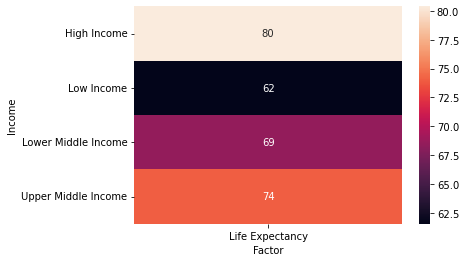

In [247]:
#lifeHeatDict -> will be switched to a pivot table -> 'Value' key contains the values within the pivot table, income
#contains the y-axis, columns contain the x-axis

#Done for life expectancy data

lifeHeatDict = {
    
    'Income': ['Low Income','Lower Middle Income','Upper Middle Income','High Income'],
    'Factor': ['Life Expectancy','Life Expectancy','Life Expectancy','Life Expectancy'],
    'Value': [lowLife,lowMidlife,upMidlife,upLife]
    
}

#Convert the dictionary to a pandas dataframe
lifeMapdata = pd.DataFrame(lifeHeatDict)
#Convert to a pivot table (pivot is an instance method)
lifeMapdata = lifeMapdata.pivot(index= 'Income',columns='Factor',values='Value')
#Make a seaborn heatmap of the pandas pivot table
lifeMap = sns.heatmap(lifeMapdata,annot=True)

In [248]:
#Install geopandas dataframe for chloropleth area map
!pip install --upgrade geopandas

import geopandas

In [249]:
#geopandas dataframe -> All the areas for the area map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [250]:
#Convert iso_a2 codes to iso_a3 codes
# -> This is done by converting iso_a2 codes to country name and convert country name to iso_a3 country codes

from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3


countryCode = [country_name_to_country_alpha3(country_alpha2_to_country_name(i)) for i in fullFrame['Country_Region']\
              .iloc]


#Add ISO_a3 column to pandas dataframe
fullFrame['ISO_a3'] = np.array(countryCode)

In [251]:
fullFrame.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec,"GDP per capita, PPP",Population,vaccination_per_pop,ISO_a3
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972,67119.153244,9910892,89.12,ARE
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833,2065.036235,39074280,9.13,AFG
3,,AG,2021-12-09,118765,61420,57345,2021-12-09,28,3.0,High income,77.016,21548.725008,98069,58.47,ATG
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573,13671.488422,2877239,34.10,ALB
5,,AM,2021-12-09,1352805,835816,516989,2021-12-09,51,3.0,Upper middle income,75.087,13653.763381,2964219,17.44,ARM


In [252]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [253]:
#If any column iso_a3 values are not in the fullFrame dataframe -> drop it from the geopandas world dataframe
draft = world

for i in draft['iso_a3']:
    
    if i not in fullFrame['ISO_a3'].values:
        world = world.drop(world.loc[world['iso_a3'] == i].index)

In [254]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


In [255]:
world.shape

(135, 6)

In [256]:
#If any column iso_a3 values are not in the geopandas world dataframe -> drop it from the fullFrame dataframe
mapCopy = fullFrame

for i in mapCopy['ISO_a3']:
    if i not in world['iso_a3'].values:
        mapCopy = mapCopy.drop(mapCopy.loc[mapCopy['ISO_a3'] == i].index)

In [257]:
mapCopy.shape

(135, 15)

In [258]:
#Sort the values in both dataframes
world = world.sort_values('iso_a3')
mapCopy = mapCopy.sort_values('ISO_a3')

In [259]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [260]:
mapCopy.head()

,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Income,income,Life_Expec,"GDP per capita, PPP",Population,vaccination_per_pop,ISO_a3
2,,AF,2021-12-09,5228706,4397449,3566192,2021-12-09,4,3.0,Low income,64.833,2065.036235,39074280,9.13,AFG
6,,AO,2021-12-09,10018061,6737721,3280340,2021-12-09,24,3.0,Lower middle income,61.147,6670.331458,33032075,9.93,AGO
4,,AL,2021-12-09,2161198,1090591,981170,2021-12-09,8,3.0,Upper middle income,78.573,13671.488422,2877239,34.10,ALB
1,,AE,2021-12-09,22080184,9801529,8832256,2021-12-09,784,3.0,High income,77.972,67119.153244,9910892,89.12,ARE
7,,AR,2021-12-09,67938130,37157341,30636165,2021-12-09,32,3.0,Upper middle income,76.667,22063.904372,45267449,67.68,ARG


In [261]:
#Extract the values for the map (mapGDP is for mapping gdp values, mapLife is for mapping life expectancy values, \
#mapVac is for apping vaccination rate values.)
mapGDP = mapCopy['GDP per capita, PPP'].values
mapLife = mapCopy['Life_Expec'].values
mapVac = mapCopy['vaccination_per_pop'].values


In [262]:
world['gdp'] = mapGDP
world['life'] = mapLife
world['vax'] = mapVac

In [263]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp,life,vax
103,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",2065.036235,64.833,9.13
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",6670.331458,61.147,9.93
125,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",13671.488422,78.573,34.10
84,6072475,Asia,United Arab Emirates,ARE,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",67119.153244,77.972,89.12
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",22063.904372,76.667,67.68


Text(0.5, 1.0, 'GDP Per Capita in Countries around the World')

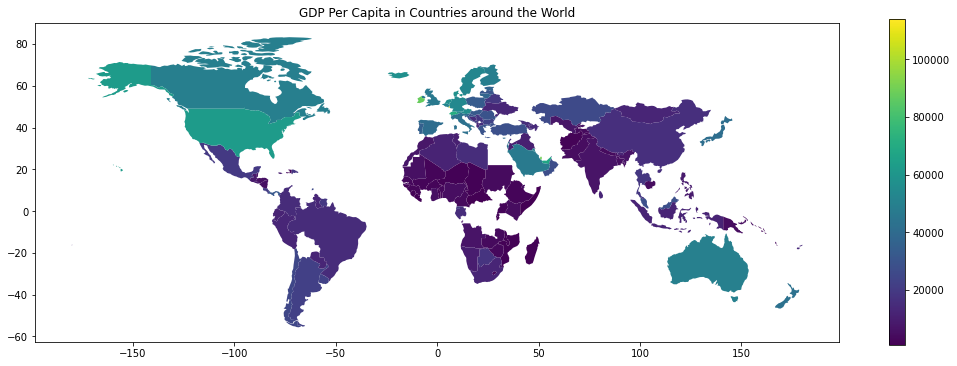

In [264]:


world.plot(column='gdp',legend=True,legend_kwds={'shrink': 0.6});


fig = plt.gcf()


fig.set_size_inches(18, 10)

plt.title('GDP Per Capita in Countries around the World')


Text(0.5, 1.0, 'Life Expectancy in Countries around the World')

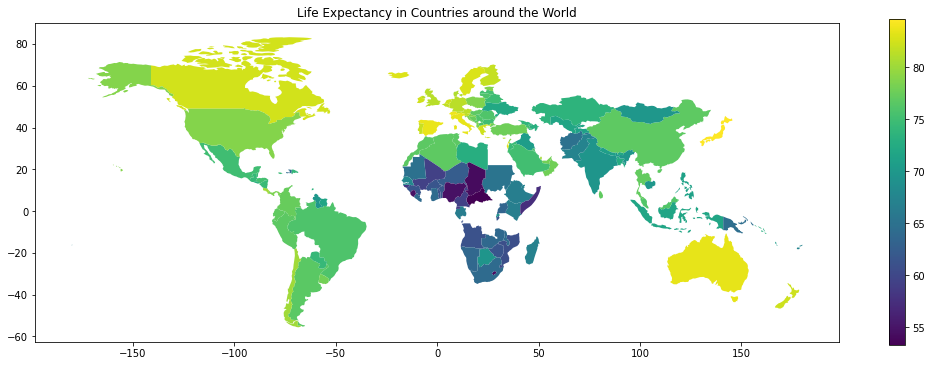

In [265]:

#.plot() -> instance method of the geopandas dataframe. Pass in column name, legend, and legend_kwds dictionary to
#shink legend
world.plot(column='life',legend=True,legend_kwds={'shrink': 0.6});

#Get current figure
fig = plt.gcf()

#set_size_inches -> instance method of the figure
fig.set_size_inches(18, 10)

#Add a title
plt.title('Life Expectancy in Countries around the World')


Text(0.5, 1.0, 'Vaccination Rate in Countries around the World')

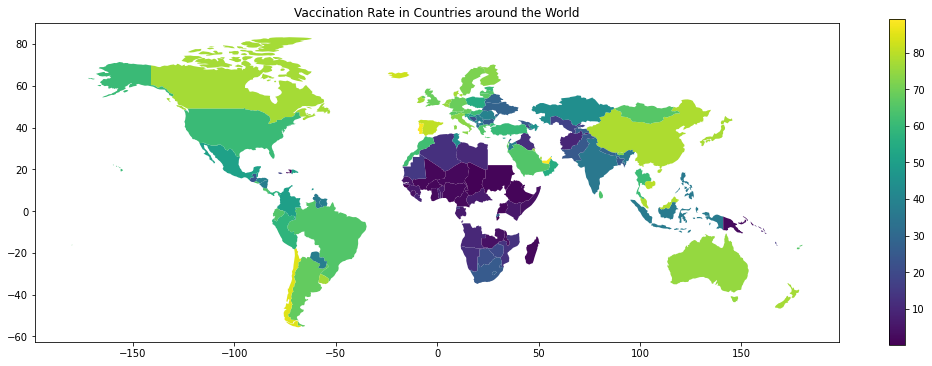

In [266]:
world.plot(column='vax',legend=True,legend_kwds={'shrink': 0.6});


fig = plt.gcf()


fig.set_size_inches(18, 10)

plt.title('Vaccination Rate in Countries around the World')
